In [1]:
from sympy import *
init_printing(use_unicode=True)
from sympy.codegen.ast import Assignment

In [2]:
C = Matrix( symarray('C', (2,2)) )
R = Matrix( symarray('R', (2,2)) )
n = Matrix( symarray('n', (2)) )
t = Matrix( symarray('t', (2)) )

In [3]:
R[0,0]=t[0]
R[1,0]=t[1]
R[0,1]=n[0]
R[1,1]=n[1]

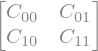

In [4]:
C

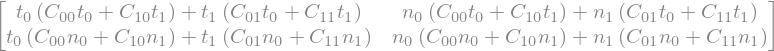

In [5]:
simplify(transpose(R)*C*R)

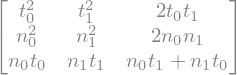

In [6]:
TensRot = Matrix( symarray('r', (3,3)) )

TensRot[0,0]=t[0]*t[0]
TensRot[0,1]=t[1]*t[1]
TensRot[0,2]=t[0]*t[1] + t[1]*t[0]
TensRot[1,0]=n[0]*n[0]
TensRot[1,1]=n[1]*n[1]
TensRot[1,2]=n[0]*n[1] + n[1]*n[0]
TensRot[2,0]=t[0]*n[0]
TensRot[2,1]=t[1]*n[1]
TensRot[2,2]=t[0]*n[1] + t[1]*n[0]
TensRot

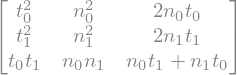

In [7]:
InvTensRot = Matrix( symarray('r', (3,3)) )

InvTensRot[0,0]=t[0]*t[0]
InvTensRot[0,1]=n[0]*n[0]
InvTensRot[0,2]=t[0]*n[0] + t[0]*n[0]
InvTensRot[1,0]=t[1]*t[1]
InvTensRot[1,1]=n[1]*n[1]
InvTensRot[1,2]=t[1]*n[1] + t[1]*n[1]
InvTensRot[2,0]=t[0]*t[1]
InvTensRot[2,1]=n[0]*n[1]
InvTensRot[2,2]=t[0]*n[1] + t[1]*n[0]
InvTensRot

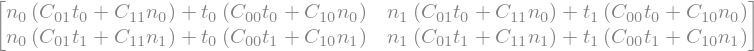

In [17]:
simplify(R*C*transpose(R))

In [8]:
print(latex(InvTensRot))

\left[\begin{matrix}t_{0}^{2} & n_{0}^{2} & 2 n_{0} t_{0}\\t_{1}^{2} & n_{1}^{2} & 2 n_{1} t_{1}\\t_{0} t_{1} & n_{0} n_{1} & n_{0} t_{1} + n_{1} t_{0}\end{matrix}\right]


In [9]:
print(latex(TensRot))

\left[\begin{matrix}t_{0}^{2} & t_{1}^{2} & 2 t_{0} t_{1}\\n_{0}^{2} & n_{1}^{2} & 2 n_{0} n_{1}\\n_{0} t_{0} & n_{1} t_{1} & n_{0} t_{1} + n_{1} t_{0}\end{matrix}\right]


In [10]:
theta = Symbol("theta")
n[0] = -sin(theta)
n[1] =  cos(theta)

t[0]= n[1]
t[1]= -n[0]

In [11]:
InvTensRot[0,0]=t[0]*t[0]
InvTensRot[0,1]=n[0]*n[0]
InvTensRot[0,2]=t[0]*n[0] + t[0]*n[0]
InvTensRot[1,0]=t[1]*t[1]
InvTensRot[1,1]=n[1]*n[1]
InvTensRot[1,2]=t[1]*n[1] + t[1]*n[1]
InvTensRot[2,0]=t[0]*t[1]
InvTensRot[2,1]=n[0]*n[1]
InvTensRot[2,2]=t[0]*n[1] + t[1]*n[0]


TensRot[0,0]=t[0]*t[0]
TensRot[0,1]=t[1]*t[1]
TensRot[0,2]=t[0]*t[1] + t[1]*t[0]
TensRot[1,0]=n[0]*n[0]
TensRot[1,1]=n[1]*n[1]
TensRot[1,2]=n[0]*n[1] + n[1]*n[0]
TensRot[2,0]=t[0]*n[0]
TensRot[2,1]=t[1]*n[1]
TensRot[2,2]=t[0]*n[1] + t[1]*n[0]


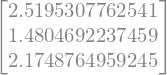

In [12]:
sigma = Matrix( symarray('\sigma', (3)) )
sigma[0]=1
sigma[1]=3
sigma[2]=2

(TensRot*sigma).subs(theta,20*pi/180).evalf()

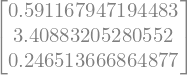

In [13]:
(Transpose(TensRot)*sigma).subs(theta,20*pi/180).evalf()

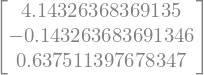

In [14]:

(InvTensRot*sigma).subs(theta,-50*pi/180).evalf()

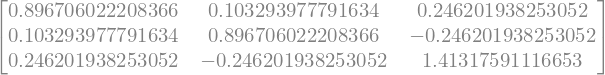

In [15]:
(Transpose(TensRot)*TensRot).subs(theta,20*pi/180).evalf()

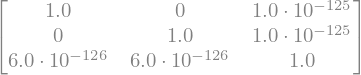

In [16]:
(InvTensRot*TensRot).subs(theta,20*pi/180).evalf()

In [ ]:
# EXTRA

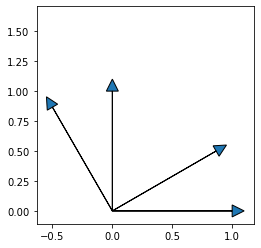

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import math

def rotMatrix(angle):
    c = np.cos(np.radians(angle))
    s = np.sin(np.radians(angle))
    return np.array([[c, -s], [s, c]])


v = np.array([0,1])
v30 = rotMatrix(30).dot(v)

plt.arrow(0,0,v[0],v[1], head_width=0.1, head_length=0.1)
plt.arrow(0,0,v30[0],v30[1],head_width=0.1, head_length=0.1)

v = np.array([1,0])
v30 = rotMatrix(30).dot(v)

plt.arrow(0,0,v[0],v[1], head_width=0.1, head_length=0.1)
plt.arrow(0,0,v30[0],v30[1],head_width=0.1, head_length=0.1)

plt.axis([-2,2,-2,2])
plt.grid
plt.axis('square')
plt.show()